In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima import auto_arima

df = pd.read_csv('data/gunviolence.csv')
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.ch

In [2]:
#cities = ['Chicago', 'Washington', 'New Orleans']

df = df.loc[(df['city_or_county'] == 'Chicago') 
            | (df['city_or_county'] == 'Washington') 
            | (df['city_or_county'] == 'New Orleans')
           ]
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.huffingtonpost.com/2013/01/21/new-o...,93.0,5.0
13,479554,2013-01-26,District of Columbia,Washington,2403 Benning Road Northeast,0,5,http://www.gunviolencearchive.org/incident/479554,http://www.washingtontimes.com/news/2013/jan/2...,False,...,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Male||3::Male||4::Mal...,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.washingtonexaminer.com/d.c.-nightcl...,NaN,NaN
17,479592,2013-02-07,Illinois,Chicago,2500 block of East 75th Street,0,4,http://www.gunviolencearchive.org/incident/479592,http://chicago.cbslocal.com/2013/02/07/four-wo...,False,...,0::18||1::41||2::28||3::28,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://crimeinchicago.blogspot.com/2013/02/4-m...,25.0,13.0
18,479603,2013-02-09,Louisiana,New Orleans,400 block of Bourbon Street,0,4,http://www.gunviolencearchive.org/incident/479603,http://www.nola.com/crime/index.ssf/2013/04/su...,False,...,0::18||1::22||2::21||3::29||4::19||5::22||6::23,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Female||2::Female||3::Male||4::Mal...,"4::Malcolm ""London"" Hall||5::Brandon Brown||6:...",NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/mardi-gras-shootin...,93.0,4.0
34,482771,2013-03-11,District of Columbia,Washington,1200 North Capitol Street,0,13,http://www.gunviolencearchive.org/incident/482771,https://www.washingtonpost.com/local/police-se...,False,...,0::19||1::19||2::17||15::21,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Male||1::Male||2::Male||3::Male||4::Male||5...,0::Craig Steven Wilson||1::Andrew Davon Allen|...,NaN,"0::Unharmed, Arrested||1::Unharmed, Arrested||...",0::Subject-Suspect||1::Subject-Suspect||2::Sub...,http://www.washingtontimes.com/news/2013/may/2...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239603,1082129,2018-03-31,Illinois,Chicago,9100 block of S Emerald Ave,0,1,http://www.gunviolencearchive.org/incident/108...,https://chicago.suntimes.com/news/woman-wounde...,False,...,0::21,0::Adult 18+,0::Female,NaN,NaN,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,https://chicago.suntimes.com/news/woman-wounde...,27.0,14.0
239608,1082729,2018-03-31,District of Columbia,Washington,1100 block of Rhode Island Ave NW,0,0,http://www.gunviolencearchive.org/incident/108...,https://www.popville.com/2018/04/shots-fired-a...,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.popville.com/2018/04/shots-fired-a...,NaN,NaN
239610,1081952,2018-03-31,District of Columbia,Washington,700 block of Congress St SE,1,0,http://www.gunviolencearchive.org/incident/108...,https://mpdc.dc.gov/release/homicide-700-block...,False,...,0::29,0::Adult 18+,0::Male,0::Jamar Bowman,NaN,0::Killed,0::Victim,https://twitter.com/DCPoliceDept/status/980218...,NaN,NaN
239648,1081946,2018-03-31,District of Columbia,Washington,600 block of Alabama Ave SE,0,0,http://www.gunviolencearchive.org/incident/108...,https://twitter.com/DCPoliceDept/status/980251...,False,...,NaN,NaN,NaN,

In [3]:
df['Date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df

<ipython-input-3-d1f1921815fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')


,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,Date
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.huffingtonpost.com/2013/01/21/new-o...,93.0,5.0,2013-01-21
13,479554,2013-01-26,District of Columbia,Washington,2403 Benning Road Northeast,0,5,http://www.gunviolencearchive.org/incident/479554,http://www.washingtontimes.com/news/2013/jan/2...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Male||3::Male||4::Mal...,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.washingtonexaminer.com/d.c.-nightcl...,NaN,NaN,2013-01-26
17,479592,2013-02-07,Illinois,Chicago,2500 block of East 75th Street,0,4,http://www.gunviolencearchive.org/incident/479592,http://chicago.cbslocal.com/2013/02/07/four-wo...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://crimeinchicago.blogspot.com/2013/02/4-m...,25.0,13.0,2013-02-07
18,479603,2013-02-09,Louisiana,New Orleans,400 block of Bourbon Street,0,4,http://www.gunviolencearchive.org/incident/479603,http://www.nola.com/crime/index.ssf/2013/04/su...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Female||2::Female||3::Male||4::Mal...,"4::Malcolm ""London"" Hall||5::Brandon Brown||6:...",NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/mardi-gras-shootin...,93.0,4.0,2013-02-09
34,482771,2013-03-11,District of Columbia,Washington,1200 North Capitol Street,0,13,http://www.gunviolencearchive.org/incident/482771,https://www.washingtonpost.com/local/police-se...,False,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Male||1::Male||2::Male||3::Male||4::Male||5...,0::Craig Steven Wilson||1::Andrew Davon Allen|...,NaN,"0::Unharmed, Arrested||1::Unharmed, Arrested||...",0::Subject-Suspect||1::Subject-Suspect||2::Sub...,http://www.washingtontimes.com/news/2013/may/2...,NaN,NaN,2013-03-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239603,1082129,2018-03-31,Illinois,Chicago,9100 block of S Emerald Ave,0,1,http://www.gunviolencearchive.org/incident/108...,https://chicago.suntimes.com/news/woman-wounde...,False,...,0::Adult 18+,0::Female,NaN,NaN,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,https://chicago.suntimes.com/news/woman-wounde...,27.0,14.0,2018-03-31
239608,1082729,2018-03-31,District of Columbia,Washington,1100 block of Rhode Island Ave NW,0,0,http://www.gunviolencearchive.org/incident/108...,https://www.popville.com/2018/04/shots-fired-a...,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.popville.com/2018/04/shots-fired-a...,NaN,NaN,2018-03-31
239610,1081952,2018-03-31,District of Columbia,Washington,700 block of Congress St SE,1,0,http://www.gunviolencearchive.org/incident/108...,https://mpdc.dc.gov/release/homicide-700-block...,False,...,0::Adult 18+,0::Male,0::Jamar Bowman,NaN,0::Killed,0::Victim,https://twitter.com/DCPoliceDept/status/980218...,NaN,NaN,2018-03-31
239648,1081946,2018-03-31,District of Columbia,Washington,600 block of Alabama Ave SE,0,0,http://www.gunviolencearchive.org/incident/108...,https://twitter.com/DCPoliceDept/status/980251...,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/DCPoliceDept/statu

In [4]:
us = df.copy()
us = us[['city_or_county', 'n_killed', 'Date']]
us = us.set_index(['city_or_county', 'Date'])
us

n_killed
city_or_county Date                
New Orleans    2013-01-21         0
Washington     2013-01-26         0
Chicago        2013-02-07         0
New Orleans    2013-02-09         0
Washington     2013-03-11         0
...                             ...
Chicago        2018-03-31         0
Washington     2018-03-31         0
               2018-03-31         1
               2018-03-31         0
Chicago        2018-03-31         0

[17164 rows x 1 columns]

In [5]:
#to_drop = us[us['n_killed'] == 0].index
#us.drop(to_drop, inplace = True)
us

n_killed
city_or_county Date                
New Orleans    2013-01-21         0
Washington     2013-01-26         0
Chicago        2013-02-07         0
New Orleans    2013-02-09         0
Washington     2013-03-11         0
...                             ...
Chicago        2018-03-31         0
Washington     2018-03-31         0
               2018-03-31         1
               2018-03-31         0
Chicago        2018-03-31         0

[17164 rows x 1 columns]

In [6]:
chicago = us.loc['Chicago']
new_orleans = us.loc['New Orleans']
washington = us.loc['Washington']

chicago

,n_killed
Date,
2013-02-07,0
2013-03-21,0
2013-05-20,0
2013-05-29,0
2013-06-10,1
...,...
2018-03-30,0
2018-03-30,0
2018-03-31,0


In [7]:
new_orleans

,n_killed
Date,
2013-01-21,0
2013-02-09,0
2013-05-12,0
2013-06-23,0
2014-01-01,1
...,...
2018-03-26,1
2018-03-27,0
2018-03-28,0


In [8]:
washington

,n_killed
Date,
2013-01-26,0
2013-03-11,0
2013-07-13,0
2013-09-12,1
2013-11-05,0
...,...
2018-03-30,0
2018-03-31,0
2018-03-31,0


In [9]:
#Stationarity?

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)
    if p_value <= signif:
        print(f"P={p_value}. Stationary.")
    else:
        print(f"P={p_value}. Non-Stationary.")
        
# ADF Test on each column

for name, column in chicago.iteritems():
    print(column.name, end=" || ")
    adfuller_test(column, name=column.name)

n_killed || P=0.0. Stationary.


In [10]:
stepwise_fit = auto_arima(chicago['n_killed'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=12149.608, Time=1.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12193.991, Time=0.65 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12145.353, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12146.663, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14248.262, Time=0.35 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=12146.160, Time=0.52 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=12146.386, Time=1.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=12147.770, Time=3.41 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=13664.167, Time=0.21 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 8.539 seconds


In [11]:
chicago_train = chicago.iloc[:-5]
chicago_test = chicago.iloc[-5:]

model = ARIMA(chicago, order=(1, 0, 0))
res = model.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [12]:
index_future_dates_chicago = pd.date_range(start='2018-03-31', end='2019-03-31', freq = 'm')
chicago_prediction = res.predict(start=len(chicago), end=len(chicago)+12, typ='levels').rename('Arima Predictions')
chicago_prediction.index = index_future_dates_chicago
print(chicago_prediction)

2018-03-31    0.181262
2018-04-30    0.193651
2018-05-31    0.194498
2018-06-30    0.194556
2018-07-31    0.194560
2018-08-31    0.194560
2018-09-30    0.194560
2018-10-31    0.194560
2018-11-30    0.194560
2018-12-31    0.194560
2019-01-31    0.194560
2019-02-28    0.194560
2019-03-31    0.194560
Freq: M, Name: Arima Predictions, dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


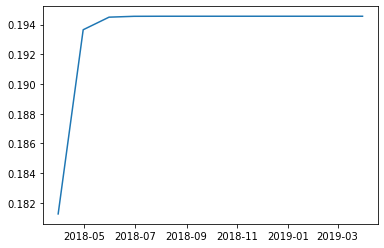

In [13]:
fig, ax = plt.subplots()
ax.plot(chicago_prediction)

In [14]:
#Washington

for name, column in washington.iteritems():
    print(column.name, end=" || ")
    adfuller_test(column, name=column.name)

n_killed || P=0.0. Stationary.


In [15]:
stepwise_fit = auto_arima(washington['n_killed'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2681.008, Time=1.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4764.287, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3864.229, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2681.301, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4762.287, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2682.119, Time=1.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2678.579, Time=1.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2678.084, Time=1.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2678.309, Time=0.98 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3517.058, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2676.108, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2679.331, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3862.230, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2676.600, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [16]:
index_future_dates_washington = pd.date_range(start='2018-03-31', end='2019-03-31', freq = 'm')
washington_prediction = res.predict(start=len(washington), end=len(washington)+12, typ='levels').rename('Arima Predictions')
washington_prediction.index = index_future_dates_washington
print(washington_prediction)

2018-03-31    0.181262
2018-04-30    0.181262
2018-05-31    0.181262
2018-06-30    0.386306
2018-07-31    0.181262
2018-08-31    0.249610
2018-09-30    0.181262
2018-10-31    0.249610
2018-11-30    0.181262
2018-12-31    0.181262
2019-01-31    0.181262
2019-02-28    0.181262
2019-03-31    0.181262
Freq: M, Name: Arima Predictions, dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

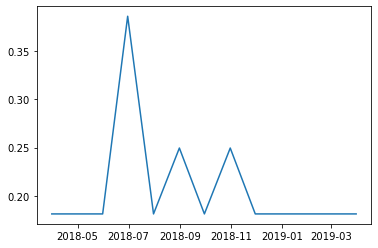

In [17]:
washington_train = washington.iloc[:-5]
washington_test = washington.iloc[-5:]

model = ARIMA(washington_train, order=(1,1,1))
res = model.fit()

fig, ax = plt.subplots()
ax.plot(washington_prediction)

In [18]:
#New Orleans

for name, column in new_orleans.iteritems():
    print(column.name, end=" || ")
    adfuller_test(column, name=column.name)

n_killed || P=0.0. Stationary.


In [19]:
stepwise_fit = auto_arima(new_orleans['n_killed'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3951.960, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3960.289, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3948.896, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3949.110, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4635.677, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3950.704, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3948.807, Time=0.74 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3949.622, Time=1.31 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3949.508, Time=1.69 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3950.903, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.51 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 5.995 seconds


In [20]:
index_future_dates_new_orleans = pd.date_range(start='2018-03-31', end='2019-03-31', freq = 'm')
new_orleans_prediction = res.predict(start=len(new_orleans), end=len(new_orleans)+12, typ='levels').rename('Arima Predictions')
new_orleans_prediction.index = index_future_dates_new_orleans
print(new_orleans_prediction)

2018-03-31    0.062301
2018-04-30    0.061405
2018-05-31    0.060522
2018-06-30    0.059652
2018-07-31    0.058794
2018-08-31    0.057950
2018-09-30    0.057117
2018-10-31    0.112336
2018-11-30    0.069284
2018-12-31    0.068286
2019-01-31    0.067303
2019-02-28    0.122373
2019-03-31    0.079175
Freq: M, Name: Arima Predictions, dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

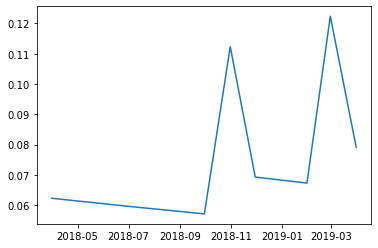

In [21]:
new_orleans_train = new_orleans.iloc[:-5]
new_orleans_test = new_orleans.iloc[-5:]

model = ARIMA(new_orleans_train, order=(1, 0, 1))
res = model.fit()

fig, ax = plt.subplots()
ax.plot(new_orleans_prediction)

In [22]:
#US

for name, column in us.iteritems():
    print(column.name, end=" || ")
    adfuller_test(column, name=column.name)

n_killed || P=0.0. Stationary.


In [23]:
stepwise_fit = auto_arima(us['n_killed'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=19093.164, Time=7.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=19127.560, Time=0.93 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=19094.120, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=19095.379, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22313.072, Time=0.49 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=19090.889, Time=4.82 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=19090.592, Time=1.51 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=19090.903, Time=1.52 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=19092.977, Time=3.66 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=19092.911, Time=2.35 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=21413.560, Time=0.71 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 24.842 seconds


In [25]:
#couldn't get US to work

index_future_dates_us = pd.date_range(start='2018-03-31', end='2019-03-31', freq = 'm')
us_prediction = res.predict(start=len(us), end=len(us)+12, typ='levels').rename('Arima Predictions')
us_prediction.index = index_future_dates_us
print(us_prediction)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
us_train = us.iloc[:-5]
us_test = us.iloc[-5:]

model = ARIMA(us_train, order=(0, 0, 2))
res = model.fit(disp=-1)

fig, ax = plt.subplots()
ax.plot(us_prediction)

In [28]:
#Q2.2

#Use a logistic regression as another predictor. You would have to use the number of people that were killed
#or injured as your y and test against where these attacks happened (either city_county or state) and the age groups.

,city_or_county,n_killed
7,New Orleans,0
13,Washington,0
17,Chicago,0
18,New Orleans,0
34,Washington,0
...,...,...
239603,Chicago,0
239608,Washington,0
239610,Washington,1
239648,Washington,0
